# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
%matplotlib inline

# Data Loading

In [4]:
housing_price = pd.read_csv("Housing.csv")
# Get the bigger picture about the dataset
housing_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Exploration

In [5]:
# Check the structure of the dataset
print(housing_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
#check the column of the datasett
housing_price.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
# checking the structure of the data
housing_price.shape

(545, 13)

In [8]:
# statistics for numeric variables
housing_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
# Check if there is missing values
print(housing_price.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [11]:
#checking duplicate values
housing_price.duplicated().sum()

0

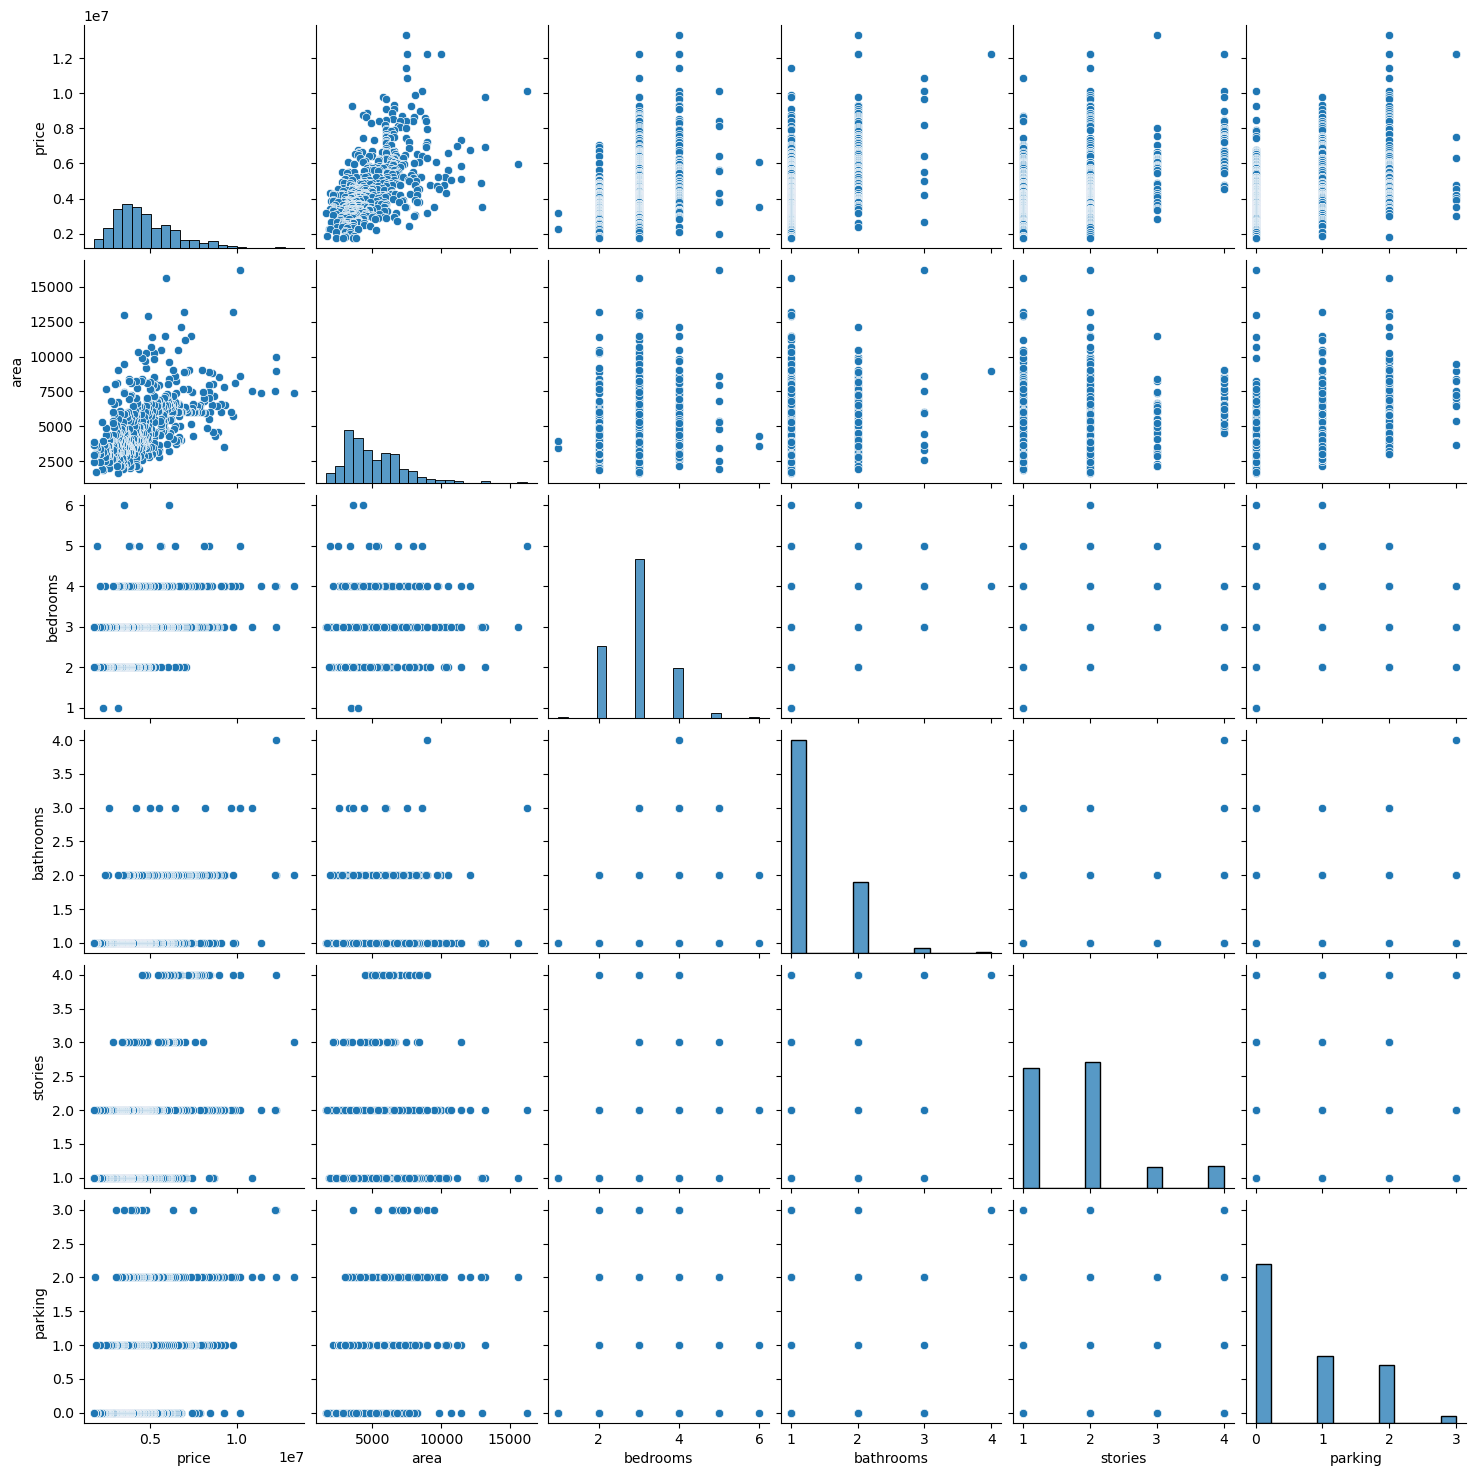

In [12]:
# check the relationship between the numerical attributes
sns.pairplot(housing_price)
plt.show()

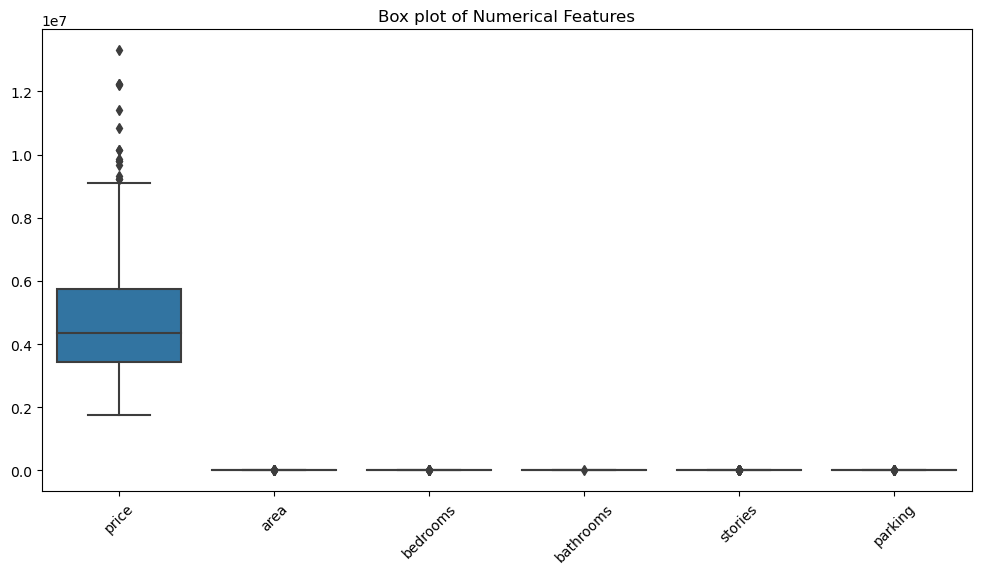

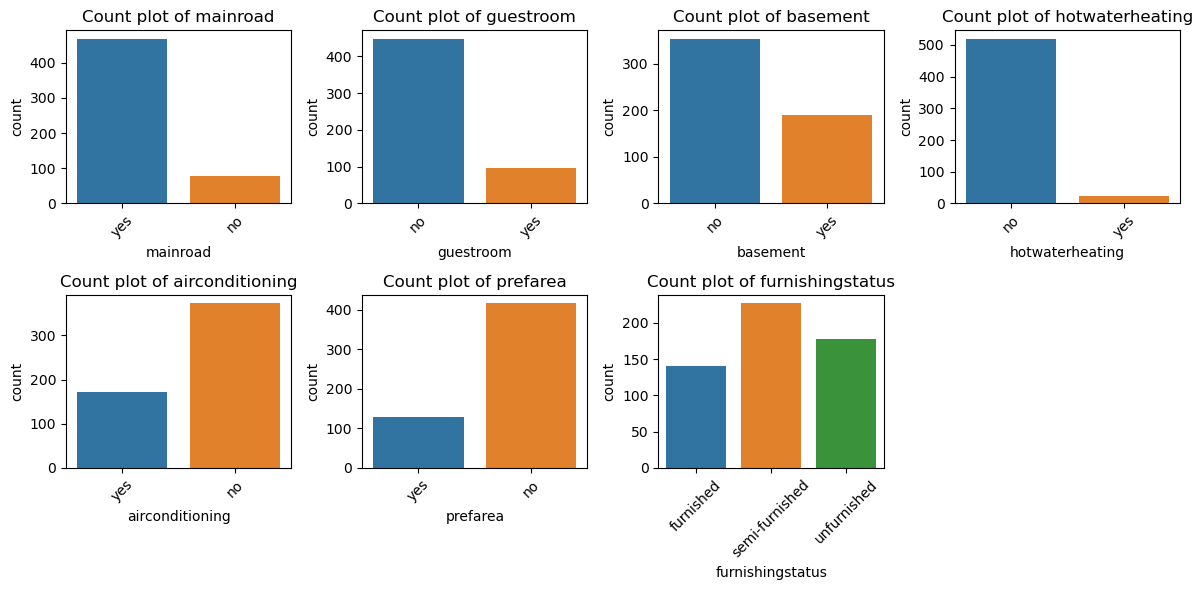

In [13]:
# Visualize numerical features using box plots to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=housing_price[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.title('Box plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Visualize categorical features using count plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, data=housing_price)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Summary statistics of winsorized 'price' column:
count    5.450000e+02
mean     4.712624e+06
std      1.650133e+06
min      2.450000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      8.400000e+06
Name: price, dtype: float64


C:\Users\mofok\anaconda3\lib\site-packages\numpy\lib\function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


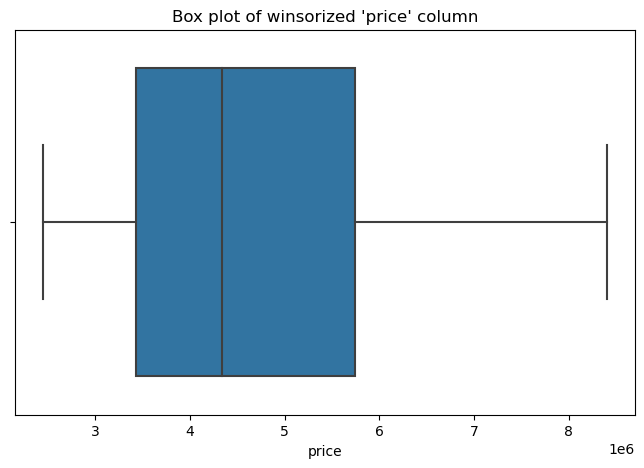

In [14]:
from scipy.stats.mstats import winsorize

# Winsorize the 'price' column to handle outliers
winsorized_price = winsorize(housing_price['price'], limits=[0.05, 0.05])

# Replace the original 'price' column with the winsorized values
housing_price['price'] = winsorized_price

# Check the summary statistics of the winsorized 'price' column
print("Summary statistics of winsorized 'price' column:")
print(housing_price['price'].describe())

# Visualize the winsorized 'price' column
plt.figure(figsize=(8, 5))
sns.boxplot(x=housing_price['price'])
plt.title("Box plot of winsorized 'price' column")
plt.show()


In [15]:
# check how the attributes corrolate to each other after winsorized
housing_price.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.538937,0.369350,0.504247,0.440189,0.369016
area,0.538937,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.369350,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.504247,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.440189,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.369016,0.352980,0.139270,0.177496,0.045547,1.000000


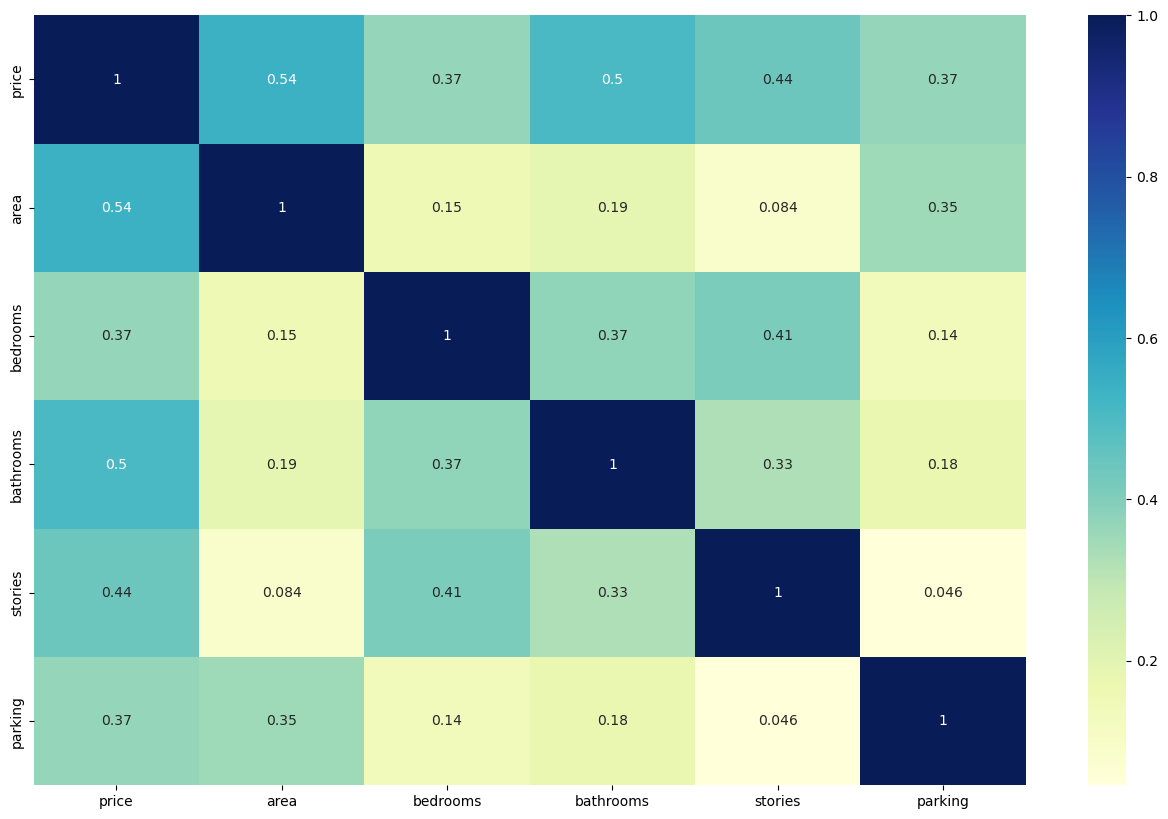

In [16]:
# visualise the correlation of variables
plt.figure(figsize = (16, 10))
sns.heatmap(housing_price.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Explorative Data Analytics

In [60]:
from ydata_profiling import ProfileReport

In [61]:
#initialize profile variable to use it to find the analytics about the data
profile= ProfileReport(housing_price,title="Pandas Profiling Report", explorative=True)

#Output the report about the data
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Pre-processing

In [18]:
# Identify numerical columns
numerical_columns = housing_price.select_dtypes(include=['int64', 'float64']).columns

# Identify categorical columns
categorical_columns = housing_price.select_dtypes(include=['object']).columns

# Apply StandardScaler to numerical columns
#scaler = StandardScaler()
scaler = MinMaxScaler()
data_scaled = housing_price.copy()
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])

# Convert categorical variables into numerical representations
data_scaled = pd.get_dummies(data_scaled, columns=categorical_columns, drop_first=True)

In [19]:
# check the statistic of variable after applying standard scaler to numeric variables and label Encoder to categorocal variables
data_scaled.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.380273,0.240587,0.393028,0.095413,0.268502,0.231193,0.858716,0.177982,0.350459,0.045872,0.315596,0.234862,0.416514,0.326606
std,0.277333,0.149151,0.147613,0.167490,0.289164,0.287195,0.348635,0.382849,0.477552,0.209399,0.465180,0.424302,0.493434,0.469402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.164706,0.134021,0.200000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.317647,0.202749,0.400000,0.000000,0.333333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.552941,0.323711,0.400000,0.333333,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


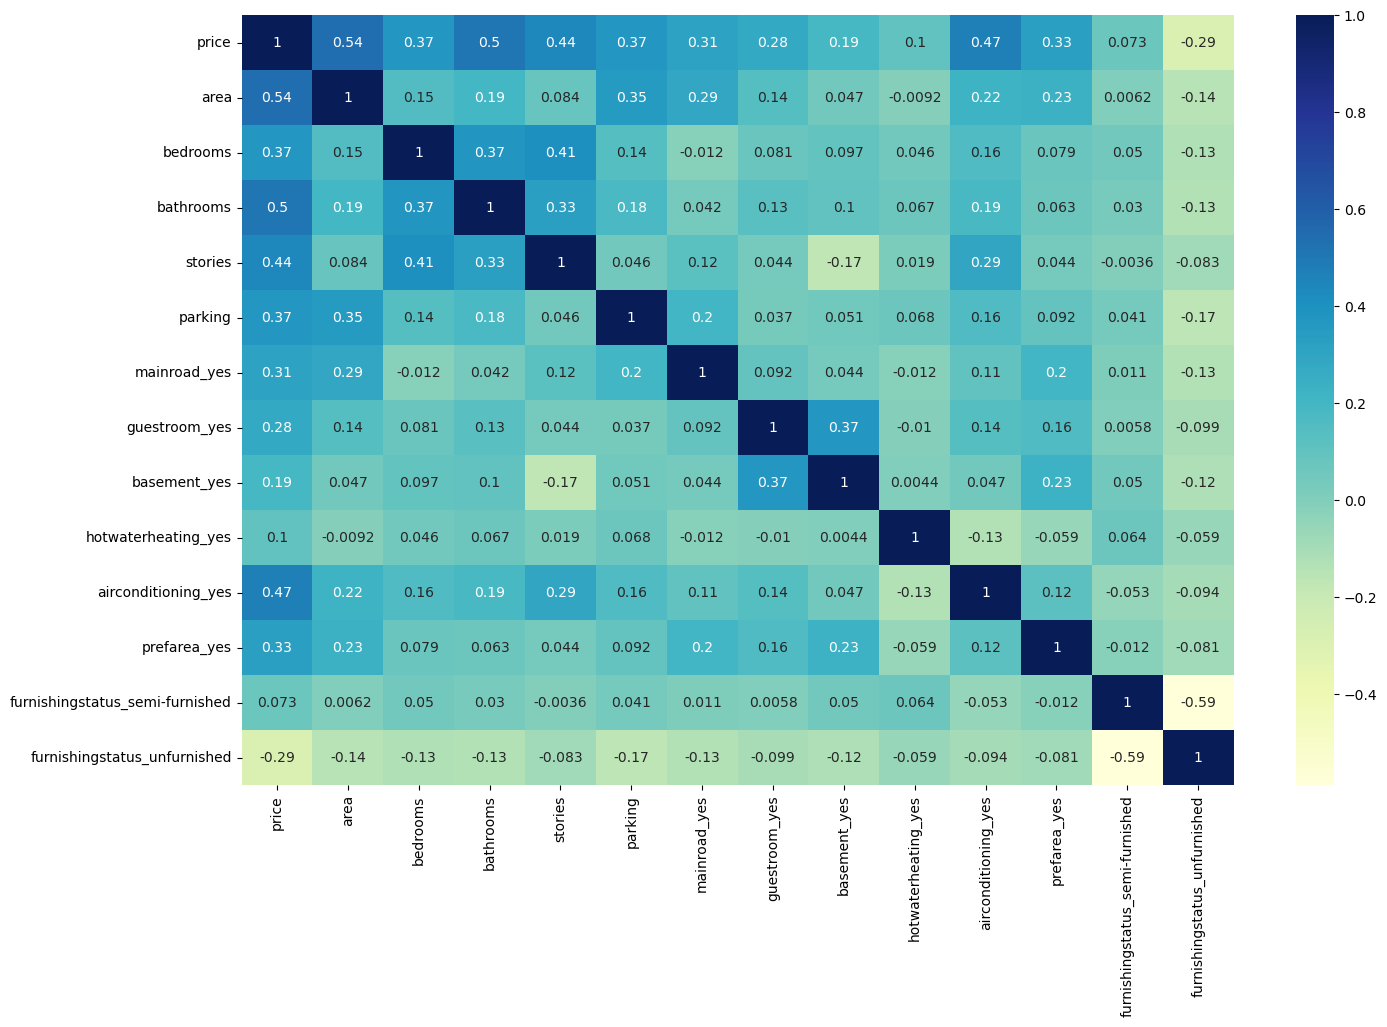

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(data_scaled.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [21]:
# Split the data into feature (X) and target (y)
X = data_scaled.drop(['price'], axis=1)
y = data_scaled['price']

In [35]:
from pycaret.regression import *

# Convert splitted data into dataframe
dataset = pd.concat([X, y], axis=1)

# Set up the target and the dataset for regression
regression_setup = setup(data=dataset, target='price')

# Compare models and tune hyperparameters
best_model = compare_models()

,Description,Value
0,Session id,1208
1,Target,price
2,Target type,Regression
3,Original data shape,"(545, 14)"
4,Transformed data shape,"(545, 14)"
5,Transformed train set shape,"(381, 14)"
6,Transformed test set shape,"(164, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.1170,0.0244,0.1548,0.6584,0.1082,0.7053,0.0350
lr,Linear Regression,0.1179,0.0243,0.1548,0.6580,0.1085,0.7122,0.0220
lar,Least Angle Regression,0.1179,0.0243,0.1548,0.6580,0.1085,0.7122,0.0280
br,Bayesian Ridge,0.1183,0.0243,0.1548,0.6580,0.1086,0.7171,0.0240
ridge,Ridge Regression,0.1187,0.0243,0.1549,0.6576,0.1087,0.7208,0.0280
gbr,Gradient Boosting Regressor,0.1233,0.0273,0.1638,0.6139,0.1140,0.7169,0.0630
rf,Random Forest Regressor,0.1227,0.0282,0.1668,0.6003,0.1155,0.7205,0.2010
lightgbm,Light Gradient Boosting Machine,0.1234,0.0283,0.1666,0.5956,0.1160,0.6975,0.1390
et,Extra Trees Regressor,0.1282,0.0299,0.1711,0.5795,0.1204,0.6973,0.1590
ada,AdaBoost Regressor,0.1368,0.0310,0.1752,0.5525,0.1240,0.9480,0.0670


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [36]:
#create linear regression since it is the model suitable for the dataset after the above output
lr_model= create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1111,0.0183,0.1352,0.7127,0.0982,0.4977
1,0.1427,0.0362,0.1903,0.5918,0.1226,0.4618
2,0.0933,0.0173,0.1316,0.6793,0.1008,0.6985
3,0.1065,0.0202,0.1423,0.7334,0.1056,0.9125
4,0.1288,0.0297,0.1723,0.5608,0.1216,0.6529
5,0.1215,0.0279,0.1670,0.5984,0.1108,0.6818
6,0.1229,0.0244,0.1563,0.5686,0.1113,1.0257
7,0.1165,0.0224,0.1496,0.7480,0.0993,0.4659
8,0.1317,0.0287,0.1693,0.6956,0.1173,1.2764


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
#tune the model to improve model performance
tuned_lr = tune_model(lr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1088,0.0179,0.1338,0.7187,0.0966,0.4880
1,0.1412,0.0363,0.1905,0.5910,0.1228,0.4332
2,0.0944,0.0177,0.1330,0.6725,0.1018,0.7080
3,0.1071,0.0206,0.1435,0.7287,0.1068,0.9194
4,0.1287,0.0298,0.1725,0.5596,0.1217,0.6491
5,0.1225,0.0279,0.1671,0.5981,0.1110,0.7291
6,0.1228,0.0245,0.1566,0.5672,0.1116,1.0644
7,0.1141,0.0216,0.1469,0.7571,0.0971,0.4673
8,0.1297,0.0284,0.1684,0.6988,0.1165,1.2394


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [38]:
#Evalute the model
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X is your original DataFrame and y is your target variable

# Perform feature selection
selector = SelectKBest(f_classif, k=7)
new_X = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the selected features from the original DataFrame X
selected_features = X.iloc[:, selected_feature_indices]

# Convert the selected features to a new DataFrame
new_X_df = pd.DataFrame(selected_features, columns=selected_features.columns)

# Now new_X_df contains the selected features as a DataFrame
new_X_df

,area,bathrooms,stories,guestroom_yes,airconditioning_yes,prefarea_yes,furnishingstatus_unfurnished
0,0.396564,0.333333,0.666667,0,1,1,0
1,0.502405,1.000000,1.000000,0,1,0,0
2,0.571134,0.333333,0.333333,0,0,1,0
3,0.402062,0.333333,0.333333,0,1,1,0
4,0.396564,0.000000,0.333333,1,1,0,0
...,...,...,...,...,...,...,...
540,0.092784,0.000000,0.000000,0,0,0,1
541,0.051546,0.000000,0.000000,0,0,0,0
542,0.135395,0.000000,0.000000,0,0,0,1
543,0.086598,0.000000,0.000000,0,0,0,0


In [41]:
# Convert splitted data into dataframe
data = pd.concat([new_X_df, y], axis=1)

# Set up the target and the dataset for regression
regression = setup(data=data, target='price')

# Compare models and tune hyperparameters
best = compare_models()

,Description,Value
0,Session id,7443
1,Target,price
2,Target type,Regression
3,Original data shape,"(545, 8)"
4,Transformed data shape,"(545, 8)"
5,Transformed train set shape,"(381, 8)"
6,Transformed test set shape,"(164, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.1179,0.0253,0.1568,0.6504,0.1087,0.4977,0.0230
lr,Linear Regression,0.1178,0.0253,0.1569,0.6502,0.1087,0.4949,0.0200
lar,Least Angle Regression,0.1178,0.0253,0.1569,0.6502,0.1087,0.4949,0.0230
ridge,Ridge Regression,0.1184,0.0254,0.1571,0.6495,0.1090,0.5063,0.0200
huber,Huber Regressor,0.1167,0.0254,0.1570,0.6493,0.1083,0.4702,0.0240
lightgbm,Light Gradient Boosting Machine,0.1188,0.0262,0.1596,0.6341,0.1117,0.5081,0.1350
gbr,Gradient Boosting Regressor,0.1261,0.0289,0.1675,0.6070,0.1164,0.5286,0.0440
rf,Random Forest Regressor,0.1299,0.0316,0.1751,0.5657,0.1213,0.5367,0.1620
et,Extra Trees Regressor,0.1335,0.0339,0.1795,0.5272,0.1258,0.5876,0.1460
ada,AdaBoost Regressor,0.1483,0.0358,0.1881,0.5062,0.1340,0.7714,0.0530


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [42]:
#create linear regression since it is the model suitable for the dataset after the above output
linear_model= create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0990,0.0157,0.1253,0.8003,0.0869,0.3775
1,0.1221,0.0310,0.1760,0.7166,0.1146,0.3892
2,0.1226,0.0239,0.1545,0.7191,0.1083,0.3582
3,0.1004,0.0170,0.1305,0.7688,0.0921,0.3891
4,0.1202,0.0230,0.1516,0.6965,0.1071,0.5006
5,0.1276,0.0253,0.1591,0.5051,0.1159,0.6138
6,0.1131,0.0255,0.1597,0.5785,0.1114,0.8398
7,0.0988,0.0159,0.1260,0.8120,0.0900,0.5322
8,0.1291,0.0297,0.1723,0.4094,0.1212,0.5405


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
#tune the model to improve model performance
tuned_linear = tune_model(linear_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0990,0.0157,0.1253,0.8003,0.0869,0.3775
1,0.1221,0.0310,0.1760,0.7166,0.1146,0.3892
2,0.1226,0.0239,0.1545,0.7191,0.1083,0.3582
3,0.1004,0.0170,0.1305,0.7688,0.0921,0.3891
4,0.1202,0.0230,0.1516,0.6965,0.1071,0.5006
5,0.1276,0.0253,0.1591,0.5051,0.1159,0.6138
6,0.1131,0.0255,0.1597,0.5785,0.1114,0.8398
7,0.0988,0.0159,0.1260,0.8120,0.0900,0.5322
8,0.1291,0.0297,0.1723,0.4094,0.1212,0.5405


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
#Evalute the model
evaluate_model(tuned_linear )

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [46]:
# Access the coefficients of the linear regression model
coefficients = tuned_lr.coef_

# Optionally, you can also access the intercept
intercept = tuned_lr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.53653914  0.06467295  0.31615913  0.246838    0.12133988  0.02753022
  0.05393903  0.04746179  0.15262958  0.13925186  0.11255712 -0.01151547
 -0.06908109]
Intercept: 0.0


In [47]:
# Access the coefficients of the linear regression model
coefficients_selected = tuned_linear.coef_

# Optionally, you can also access the intercept
intercept_selected = tuned_linear.intercept_

print("Coefficients:", coefficients_selected)
print("Intercept:", intercept_selected)

Coefficients: [ 0.60343313  0.548665    0.20177475  0.11047102  0.13258947  0.11846727
 -0.06998686]
Intercept: 0.06250152


In [264]:
# Access the coefficients of the linear regression model
coefficients = tuned_lr.coef_

# Optionally, you can also access the intercept
intercept = tuned_lr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.59224856  0.37585795  0.1998171   0.09566256  0.13922434  0.10143234
 -0.08675643]
Intercept: 0.09198001


# Model Training

In [53]:
# Splitting the data into training and testing sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model_lr.fit(X_train, y_train)

# Access the coefficients of the linear regression model
coefficients = model_lr.coef_

# Optionally, you can also access the intercept
intercept = model_lr.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.53800266  0.05251361  0.45162551  0.21211098  0.08783261  0.06147318
  0.04485268  0.06109214  0.11634665  0.12410345  0.0980214  -0.0097868
 -0.06024929]
Intercept: -0.01917886016964304


# Model Evaluation

In [55]:
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.030136747098031037
R-squared: 0.6891683369380881


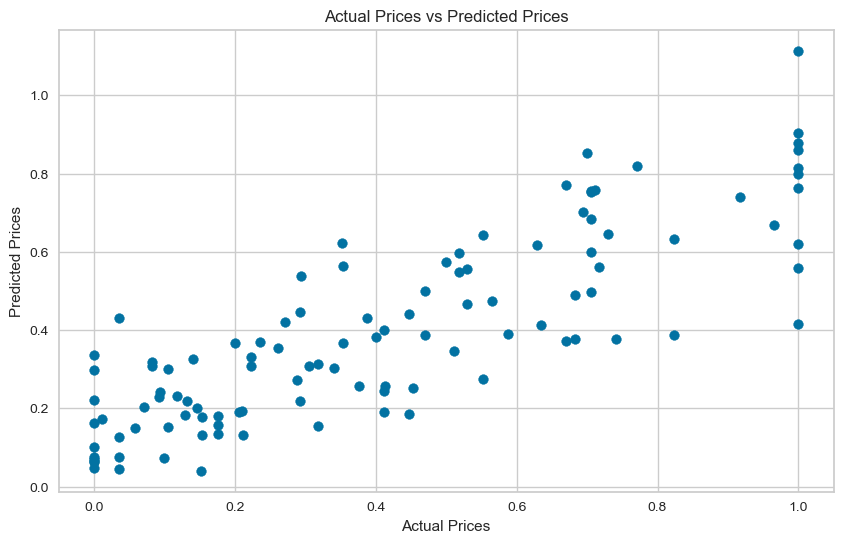

In [56]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'normalize': [True, False],  # Whether to normalize the features before regression
    'copy_X': [True, False],  # Whether to copy X before fitting the model. If False, it may overwrite the data
    'n_jobs': [None, -1]  # Number of jobs to use for the computation. None means 1, -1 means using all processors
    # Add more hyperparameters as needed
}

# Create GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': True}


In [59]:
pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.03041555449202976
R-squared: 0.6862927058798096
